## Power Grid Analysis

For our AIPI 510 Data Storytelling project, we intend to use the EIA.gov EIA-930 Data. This shows the generation and energy consumption for the electrical powergrid in the United States.

## Load the Data

We're going to load a full year's worth of data. This is looking at July 2024 - June 2025. We'll download both files now.

In [175]:
import urllib.request
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import os

path = Path()

files = {
    "EIA930_BALANCE_2025_Jan_Jun.csv": "https://www.eia.gov/electricity/gridmonitor/sixMonthFiles/EIA930_BALANCE_2025_Jan_Jun.csv",
    "EIA930_BALANCE_2024_Jul_Dec.csv": "https://www.eia.gov/electricity/gridmonitor/sixMonthFiles/EIA930_BALANCE_2024_Jul_Dec.csv",
    "EIA930_Reference_Tables.xlsx": "https://www.eia.gov/electricity/930-content/EIA930_Reference_Tables.xlsx"
}

# Download each file
for key, value in files.items():
    filename = path / key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url, filename)

## Read Data

Our first step is to understand the data and read the rows and columns that exist. We need to explore and understand what all of the columns actually mean before we can work with the data.

In [176]:
df1 = pd.read_csv("EIA930_BALANCE_2024_Jul_Dec.csv")
df2 = pd.read_csv("EIA930_BALANCE_2025_Jan_Jun.csv")

# Concat both dataframes
df = pd.concat([df1, df2], ignore_index=True)

df["UTC Time at End of Hour"] = pd.to_datetime(df["UTC Time at End of Hour"])

print(df["UTC Time at End of Hour"].min(), "to", df["UTC Time at End of Hour"].max())

print(df.columns)

df.head(10)

2024-07-01 05:00:00 to 2025-07-01 07:00:00
Index(['Balancing Authority', 'Data Date', 'Hour Number',
       'Local Time at End of Hour', 'UTC Time at End of Hour',
       'Demand Forecast (MW)', 'Demand (MW)', 'Net Generation (MW)',
       'Total Interchange (MW)', 'Sum(Valid DIBAs) (MW)',
       'Demand (MW) (Imputed)', 'Net Generation (MW) (Imputed)',
       'Total Interchange (MW) (Imputed)', 'Demand (MW) (Adjusted)',
       'Net Generation (MW) (Adjusted)', 'Total Interchange (MW) (Adjusted)',
       'Net Generation (MW) from Coal', 'Net Generation (MW) from Natural Gas',
       'Net Generation (MW) from Nuclear',
       'Net Generation (MW) from All Petroleum Products',
       'Net Generation (MW) from Hydropower Excluding Pumped Storage',
       'Net Generation (MW) from Pumped Storage',
       'Net Generation (MW) from Solar without Integrated Battery Storage',
       'Net Generation (MW) from Solar with Integrated Battery Storage',
       'Net Generation (MW) from Wind without 

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Solar witho Integrated Battery Storage (Adjusted),Net Generation (MW) from Wind without Integrated Battery Storage (Adjusted),Net Generation (MW) from Wind with Integrated Battery Storage (Adjusted),Net Generation (MW) from Battery Storage (Adjusted),Net Generation (MW) from Other Energy Storage (Adjusted),Net Generation (MW) from Unknown Energy Storage (Adjusted),Net Generation (MW) from Geothermal (Adjusted),Net Generation (MW) from Other Fuel Sources (Adjusted),Net Generation (MW) from Unknown Fuel Sources (Adjusted),Region
0,AECI,07/01/2024,1,07/01/2024 1:00:00 AM,2024-07-01 06:00:00,1970.0,2093.0,2046.0,-47.0,-47.0,...,NaN,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
1,AECI,07/01/2024,2,07/01/2024 2:00:00 AM,2024-07-01 07:00:00,1838.0,1993.0,1939.0,-54.0,-54.0,...,NaN,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
2,AECI,07/01/2024,3,07/01/2024 3:00:00 AM,2024-07-01 08:00:00,1755.0,1902.0,1907.0,5.0,5.0,...,NaN,424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
3,AECI,07/01/2024,4,07/01/2024 4:00:00 AM,2024-07-01 09:00:00,1704.0,1879.0,1834.0,-45.0,-45.0,...,NaN,456.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
4,AECI,07/01/2024,5,07/01/2024 5:00:00 AM,2024-07-01 10:00:00,1714.0,1855.0,1857.0,2.0,2.0,...,NaN,483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
5,AECI,07/01/2024,6,07/01/2024 6:00:00 AM,2024-07-01 11:00:00,1777.0,1908.0,2002.0,94.0,94.0,...,NaN,429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
6,AECI,07/01/2024,7,07/01/2024 7:00:00 AM,2024-07-01 12:00:00,1911.0,2040.0,2163.0,123.0,123.0,...,NaN,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
7,AECI,07/01/2024,8,07/01/2024 8:00:00 AM,2024-07-01 13:00:00,2041.0,2163.0,2434.0,271.0,271.0,...,NaN,322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
8,AECI,07/01/2024,9,07/01/2024 9:00:00 AM,2024-07-01 14:00:00,2159.0,2288.0,2519.0,231.0,231.0,...,NaN,309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW
9,AECI,07/01/2024,10,07/01/2024 10:00:00 AM,2024-07-01 15:00:00,2286.0,2457.0,2678.0,221.0,221.0,...,NaN,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDW


## Understanding the data

(What we talked about me doing: Data generation what BAs mean, Biases, Explain Demand vs Generation, time series data and it is hourly, difference between Demand imputed and adjusted, explain interchange. Go through each energy source and put it on a list. Drop and Impute and explain why.)

At first, there appear to be a lot of columns. If we look at the first ten, we can see that there are a lot of NaN values. However, the reason is because this is for only one balancing authority. Each balancing authority uses different types of power generation to meet demand. We're only seeing the first ten hours from the AECI balancing authority. It would be illogical to assume that one authority could have *every* type of power generation. If we look at another balancing authority, we can see the missing values are different. Below is the AVA balancing authority. You can see that they generate power with solar, whereas AECI does not. The key takeaway is that different balancing authorities have different ways of generating power.

In [177]:
print(df.iloc[4419:4429])

     Balancing Authority   Data Date  Hour Number Local Time at End of Hour  \
4419                 AVA  07/01/2024            3     07/01/2024 3:00:00 AM   
4420                 AVA  07/01/2024            4     07/01/2024 4:00:00 AM   
4421                 AVA  07/01/2024            5     07/01/2024 5:00:00 AM   
4422                 AVA  07/01/2024            6     07/01/2024 6:00:00 AM   
4423                 AVA  07/01/2024            7     07/01/2024 7:00:00 AM   
4424                 AVA  07/01/2024            8     07/01/2024 8:00:00 AM   
4425                 AVA  07/01/2024            9     07/01/2024 9:00:00 AM   
4426                 AVA  07/01/2024           10    07/01/2024 10:00:00 AM   
4427                 AVA  07/01/2024           11    07/01/2024 11:00:00 AM   
4428                 AVA  07/01/2024           12    07/01/2024 12:00:00 PM   

     UTC Time at End of Hour  Demand Forecast (MW)  Demand (MW)  \
4419     2024-07-01 10:00:00                1001.0        995.0

## Explaining the meaning of our columns

After a quick glance at the data, we can tell based on the dates and times that we have time series data down to the hour. However, there are a couple things that are not as intuitive that are explained below:

First, it is important to understand what some of the terminology means:

 - Balancing Authority (BA's): are the companies responsible for balancing electricity supply, demand, and interchange on their electric systems in real time. There are many BAs and the spreadsheet with more information about what they mean can be found here: https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fwww.eia.gov%2Felectricity%2F930-content%2FEIA930_Reference_Tables.xlsx&wdOrigin=BROWSELINK

 - Demand: Derived by taking the total metered net electricity generation within its
electric system and subtracting the total metered net electricity interchange occuring
between the BA and its neighboring BAs. Total demand should equal or approximate the sum of demand by subregion.

 - Net generation: Derived from the metered outpout of electric generating units in a
BA's electric system. Generators on the distribution system are typically not included. Total net generation should equal the sum of net generation by energy source.

 - Total interchange: Net metered tie line flow from one BA to another directly
connnected BA. Typically, demand equals net generation minus total interchange.

Next it is important to understand the differences between imputed and adjusted data values:

 - Adjusted values: To incorporate commercial arrangements, such as dynamic scheduling arrangements and interchanges on pseudo ties, BAs normally adjust their metered physical flow values to produce this alternative view of grid operations.
  - Imputed values: With imputed values, BAs occasionally report anomalous data values such as blank, zero, negative, and unreasonably high or low values. We perform a basic imputation process for several data elements. The process for imputing is slightly different for Demand, Net Generation, and Total Interchange, but usually, the EIA imputes values if the value is missing or reported as negative, zero, or at least 1.5 times greater than the maximum of past total demand values reported by that BA.

Third, there are three sources of bias in this data. These biases include:

1. There are several generation BAs that do not directly serve retail customers. Therefore
they do not report demand or demand forecasts.
2. City of Homestead (HST) has a small number of local generators that do not always produce
electricity, so it will not always have net generation to report.
3. Dynamic Scheduling and Pseduo ties can introduce some level of bias onto demand, demand
forecast, net generation and interchange.

Finally, it is important to understand the sources of energy. The sources of energy include                    Coal,
         Natural Gas,
         Nuclear,
         All Petroleum Products,
         Hydropower Excluding Pumped Storage,
         Pumped Storage',
         Solar without Integrated Battery Storage,
         Solar with Integrated Battery Storage,
         Wind without Integrated Battery Storage,
         Wind with Integrated Battery Storage,
         Battery Storage,
         Other Energy Storage,
         Unknown Energy Storage,
         Geothermal,
         Other Fuel Sources,
         Unknown Fuel Sources


____________________Double check the adjusted explanation for these columns__________________________

## Understanding Demand by Balancing Authority

We have three demand values that matter to us. We have just demand, adjusted demand, and imputed demand. We can create a new DataFrame comparing the three demands to see how they interact with each other. For most of them, we can see that $Demand_{Adjusted}=Demand+Demand_{Imputed}$. We can do this by Adding up the Demand and Imputed Demand which should equal the Adjusted Demand. We can also add another column that sets this all to zero by taking the adjusted demand and subtracting it from the sum of the demand and imputed demand.

### Conclusion
From this exploration, we can conclude that using the Adjusted Demand is the most useful metric to use for demand.

In [178]:
demand_by_ba = df.groupby(["Balancing Authority", "Region"])["Demand (MW)"].sum()
adjusted_demand_by_ba = df.groupby(["Balancing Authority", "Region"])["Demand (MW) (Adjusted)"].sum()
imputed_demand_by_ba = df.groupby(["Balancing Authority", "Region"])["Demand (MW) (Imputed)"].sum()

demand_df = pd.concat([demand_by_ba, adjusted_demand_by_ba, imputed_demand_by_ba], axis=1)

demand_df["Demand + Imputed"] = demand_df["Demand (MW)"] + demand_df["Demand (MW) (Imputed)"]

demand_df["Check Difference"] = demand_df["Demand (MW) (Adjusted)"] - (
        demand_df["Demand (MW)"] + demand_df["Demand (MW) (Imputed)"])

demand_df = demand_df.reset_index()

demand_df.to_csv("demand_comparison.csv", index=False)

## Understanding Generation by Balancing Authority

We can run nearly identical code as above to understand generation and look for discrepancies. We can see that, again, for most of the balancing authorities, we have $Generation_{Adjusted}=Generation+Generation_{Imputed}$ once again. Some of them are inaccurate. Next, we'll see which ones are inaccurate in both generation and demand, just in generation, and just in demand.

### Conclusion
Again, we can see that adjusted generation is the most useful metric to us here.

In [179]:
generation_by_ba = df.groupby(["Balancing Authority", "Region"])["Net Generation (MW)"].sum()
adjusted_generation_by_ba = df.groupby(["Balancing Authority", "Region"])["Net Generation (MW) (Adjusted)"].sum()
imputed_generation_by_ba = df.groupby(["Balancing Authority", "Region"])["Net Generation (MW) (Imputed)"].sum()

generation_df = pd.concat([generation_by_ba, adjusted_generation_by_ba, imputed_generation_by_ba], axis=1)

generation_df["Generation + Imputed"] = generation_df["Net Generation (MW)"] + generation_df[
    "Net Generation (MW) (Imputed)"]

generation_df["Check Difference"] = generation_df["Net Generation (MW) (Adjusted)"] - (
        generation_df["Net Generation (MW)"] + generation_df["Net Generation (MW) (Imputed)"])

generation_df = generation_df.reset_index()

generation_df.to_csv("generation_comparison.csv", index=False)

## Understanding Inaccuracies

We will now locate balancing authorities where the check difference is non zero. We can then turn it into a set and find the intersections and differences. This will tell us which balancing authorities have inaccuracies and whether it is just in demand, generation, or both.

### Conclusion
One interesting thing we can see from this, is that in a lot of the inaccurate imputations, the region is NW (Northwest). One hypothesis is that balancing authorities in the Northwest may use different types of power generation than other regions. We can now look into seeing which type of power generation is used most per region.

In [180]:
def show_with_region(df, ba_list):
    return df[df["Balancing Authority"].isin(ba_list)][["Balancing Authority", "Region"]]


demand_discrep = demand_df.loc[demand_df["Check Difference"] != 0, "Balancing Authority"]
gen_discrep = generation_df.loc[generation_df["Check Difference"] != 0, "Balancing Authority"]

demand_discrep = set(demand_discrep)
gen_discrep = set(gen_discrep)

both = demand_discrep.intersection(gen_discrep)
only_demand = demand_discrep.difference(gen_discrep)
only_gen = gen_discrep.difference(demand_discrep)

print("Discrepancies in both demand and generation:")
print(show_with_region(demand_df, both))

print("")
print("Discrepancies only in demand:")
print(show_with_region(demand_df, only_demand))

print("")
print("Discrepancies only in generation:")
print(show_with_region(generation_df, only_gen))

Discrepancies in both demand and generation:
   Balancing Authority Region
1                  AVA     NW
15                FMPP    FLA
17                 FPL    FLA
31                NEVP     NW
32                NWMT     NW
43                 SCL     NW
44                 SEC    FLA
47                SOCO     SE
56                 TVA    TEN
58                WALC     SW

Discrepancies only in demand:
   Balancing Authority Region
24                 IID    CAL
29                LGEE   MIDW
39                PSCO     NW
48                 SPA   CENT
57                WACM     NW

Discrepancies only in generation:
   Balancing Authority Region
9                 CPLW    CAR
36                 PGE     NW
60                 WWA     NW


## Understanding Sources of Power Generation

This graph will plot out how much power is generated in each region and what type of power is used in said region. This graph definitely looks overwhelming, but not to worry. You can focus on the orange section on the Northwest region. Notice that the amount of hydropower for every other region is significantly lower.

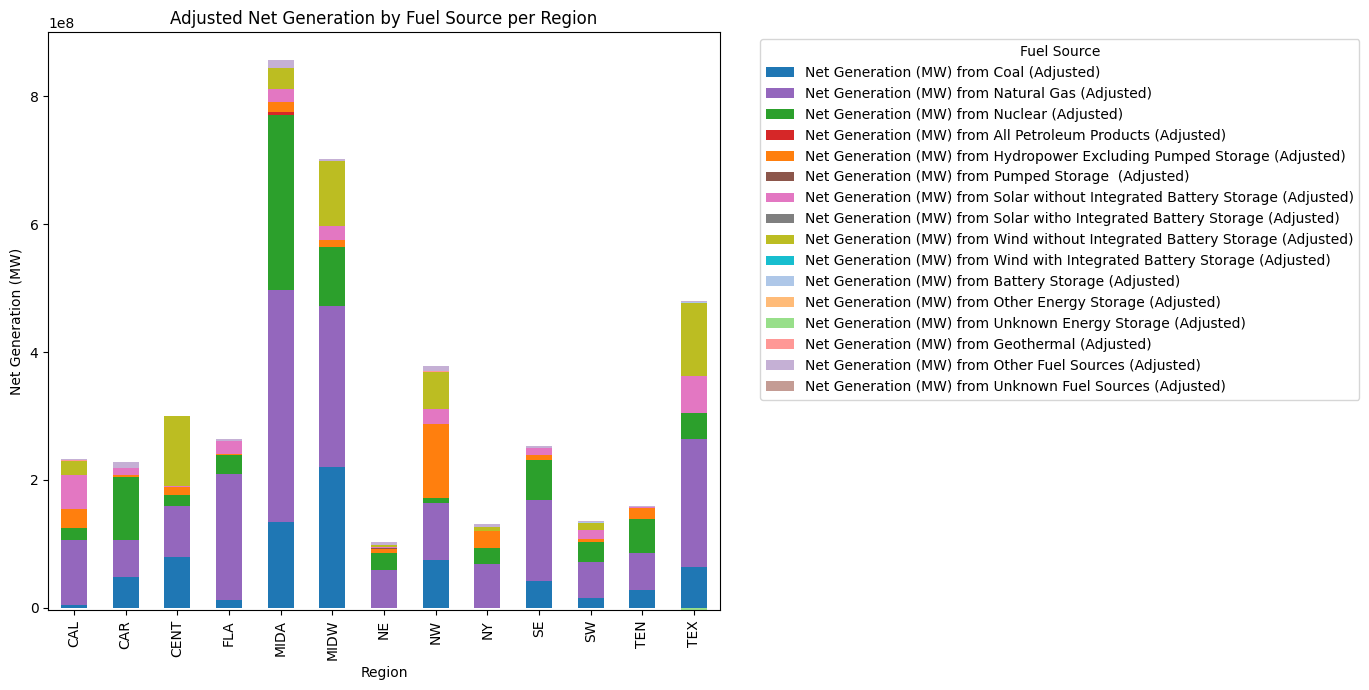

In [181]:
adjusted_cols = [col for col in df.columns if "(Adjusted)" in col and "Net Generation (MW) from" in col]
df[adjusted_cols] = df[adjusted_cols].fillna(0)
gen_by_region = df.groupby("Region")[adjusted_cols].sum()
custom_colors = [
    "#1f77b4",
    "#9467bd",
    "#2ca02c",
    "#d62728",
    "#ff7f0e",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
    "#aec7e8",
    "#ffbb78",
    "#98df8a",
    "#ff9896",
    "#c5b0d5",
    "#c49c94",
    "#f7b6d2",
    "#c7c7c7",
    "#dbdb8d",
    "#9edae5",
]

ax = gen_by_region.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    color=custom_colors
)

plt.title("Adjusted Net Generation by Fuel Source per Region")
plt.ylabel("Net Generation (MW)")
plt.xlabel("Region")
plt.legend(
    title="Fuel Source",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)
plt.tight_layout()
plt.show()

## Demand vs. Generation

We'll now take a look at demand for March 2025. Why March 2025? Because my birthday is in March. Allegedly. One of the interesting things we're doing here is scaling it to the 99th percentile. If you don't, then you see a pretty egregious outlier. There's even one outlier that has -50,000MW of generation. This does help us show that it does appear to be a pretty linear relationship. As demand goes up, so does generation. While this may seem fairly obvious, any point of interest where demand is too high would be interesting. Showing us the 99th percentile shows us that there are actually not that many outliers.

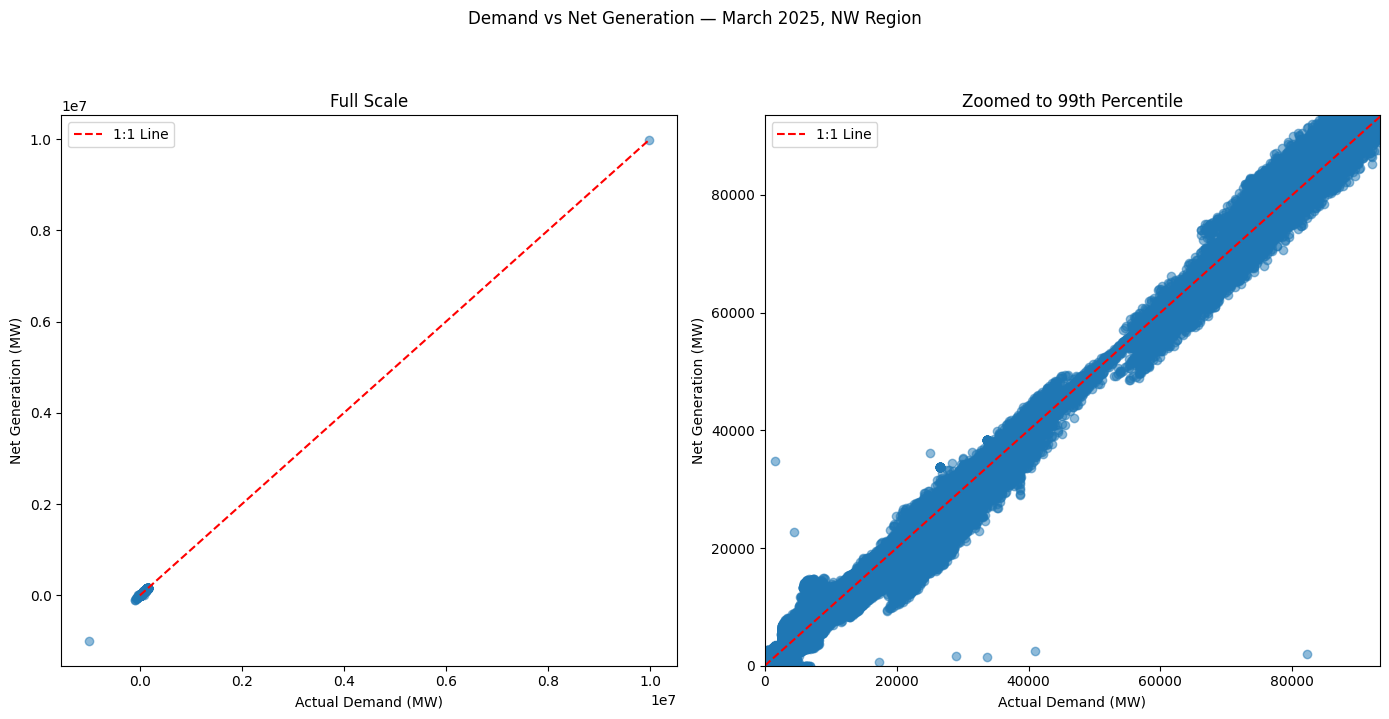

In [182]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=False, sharey=False)

# --- Left: full scale ---
axes[0].scatter(df["Demand (MW)"], df["Net Generation (MW)"], alpha=0.5)
max_val = max(df["Demand (MW)"].max(), df["Net Generation (MW)"].max())
axes[0].plot([0, max_val], [0, max_val], 'r--', label="1:1 Line")
axes[0].set_title("Full Scale")
axes[0].set_xlabel("Actual Demand (MW)")
axes[0].set_ylabel("Net Generation (MW)")
axes[0].legend()

# --- Right: zoomed to 99th percentile ---
axes[1].scatter(df["Demand (MW)"], df["Net Generation (MW)"], alpha=0.5)
axes[1].plot([0, max_val], [0, max_val], 'r--', label="1:1 Line")
xlim = df["Demand (MW)"].quantile(0.99)
ylim = df["Net Generation (MW)"].quantile(0.99)
axes[1].set_xlim(0, xlim)
axes[1].set_ylim(0, ylim)
axes[1].set_title("Zoomed to 99th Percentile")
axes[1].set_xlabel("Actual Demand (MW)")
axes[1].set_ylabel("Net Generation (MW)")
axes[1].legend()

plt.suptitle("Demand vs Net Generation — March 2025, NW Region", y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


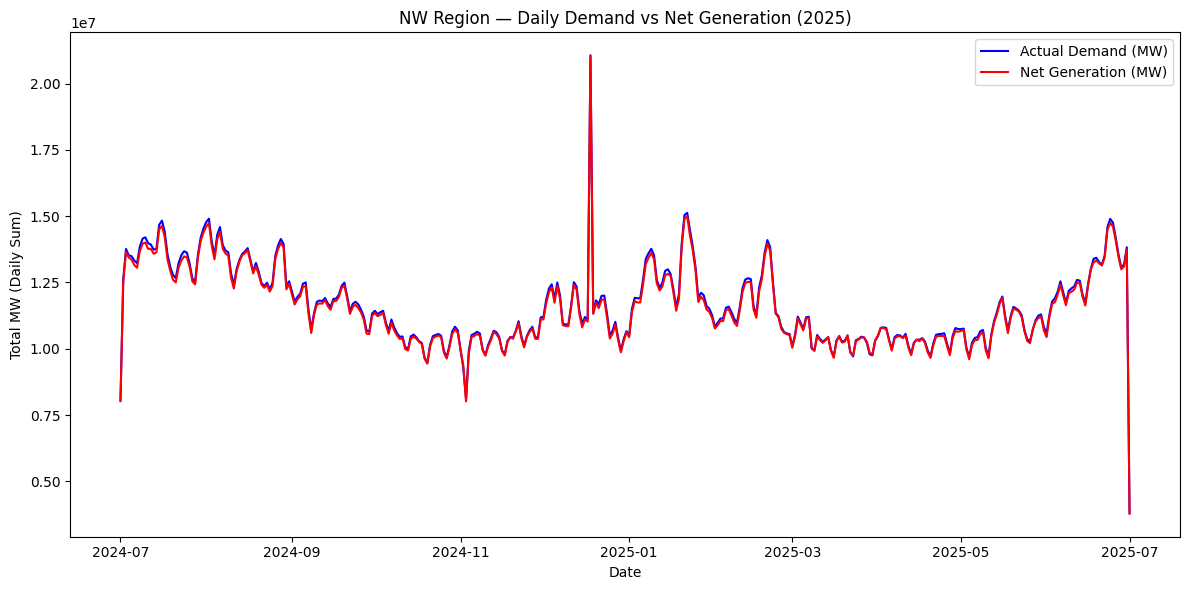

In [183]:
# Filter NW + March 2025
#nw = df[
#    (df["Region"] == "NW") &
#    (df["UTC Time at End of Hour"].dt.year == 2025) &
#    (df["UTC Time at End of Hour"].dt.month == 3)
#]

# Aggregate to daily totals
daily = df.groupby(df["UTC Time at End of Hour"].dt.date)[["Demand (MW)", "Net Generation (MW)"]].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily.index, daily["Demand (MW)"], color="blue", label="Actual Demand (MW)")
plt.plot(daily.index, daily["Net Generation (MW)"], color="red", label="Net Generation (MW)")

plt.title("NW Region — Daily Demand vs Net Generation (2025)")
plt.xlabel("Date")
plt.ylabel("Total MW (Daily Sum)")
plt.legend()
plt.tight_layout()
plt.show()

## Plotting Time Series Decomposition

Since this is time series data, we can plot out the residuals to see the trend, seasonality, and residuals. We can see that the trend varies depending on the region. This makes sense. Some regions have a very harsh summer and demand more air conditioning. Some regions have colder winters and demand more heat, but may have nicer summers and not need as much air conditioning. We can also see that there are 12 "peaks" in our seasonality. This aligns with our dataset being 12 months. We can assume there likely is a peak day of the month. However, it's unclear if each peak day of the month has any usefulness to us or whether it's random.

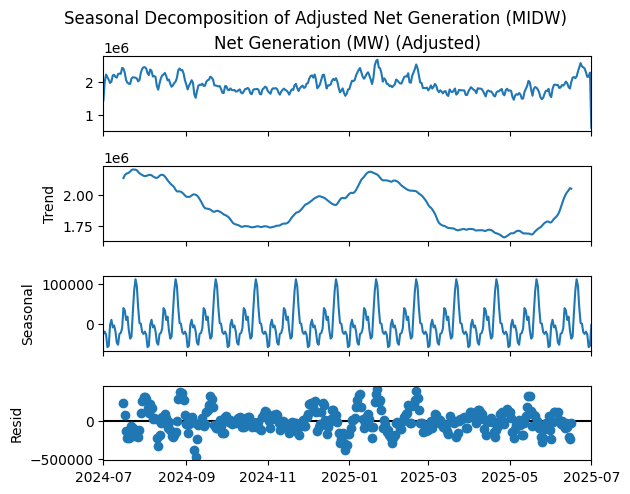

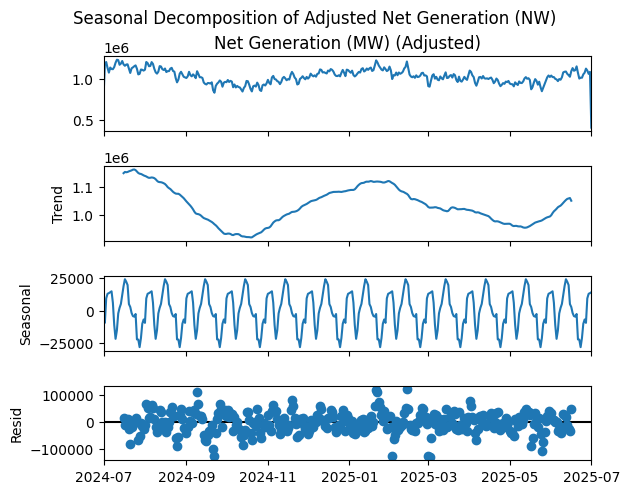

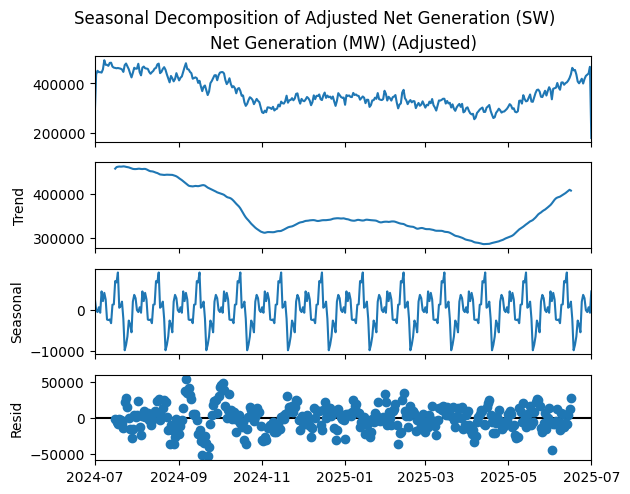

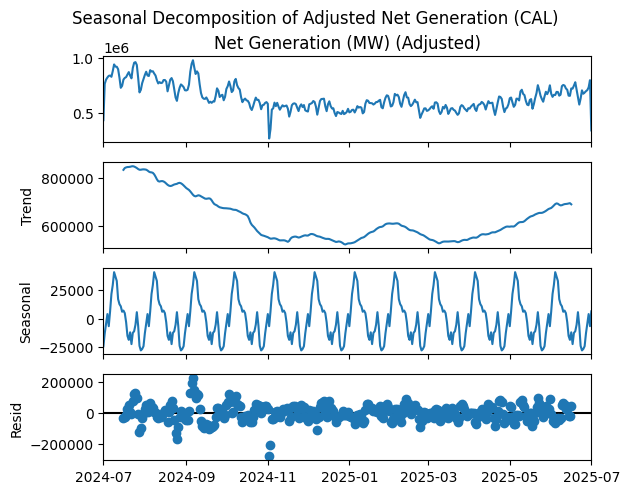

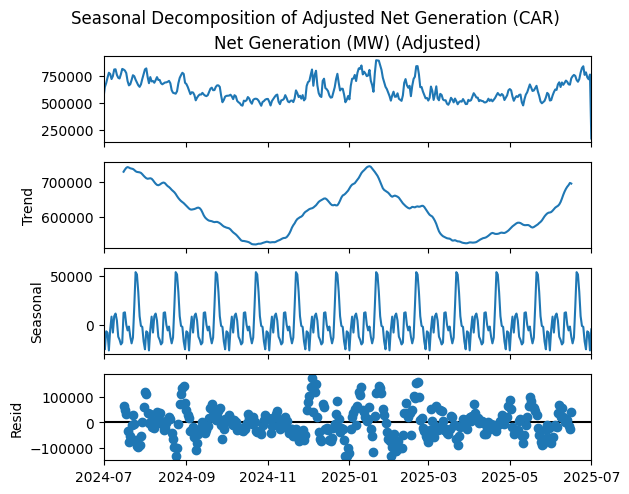

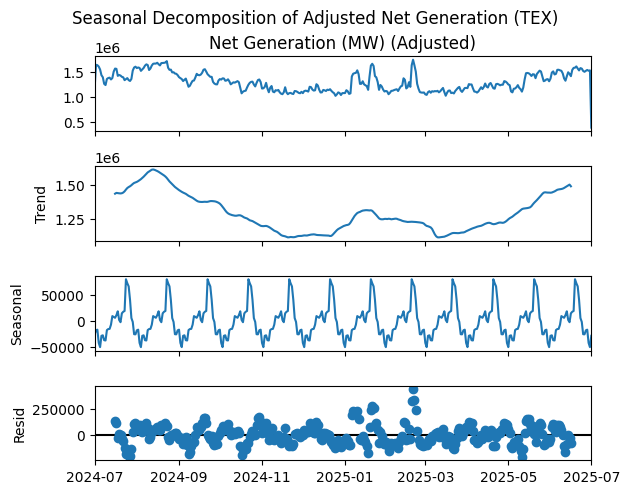

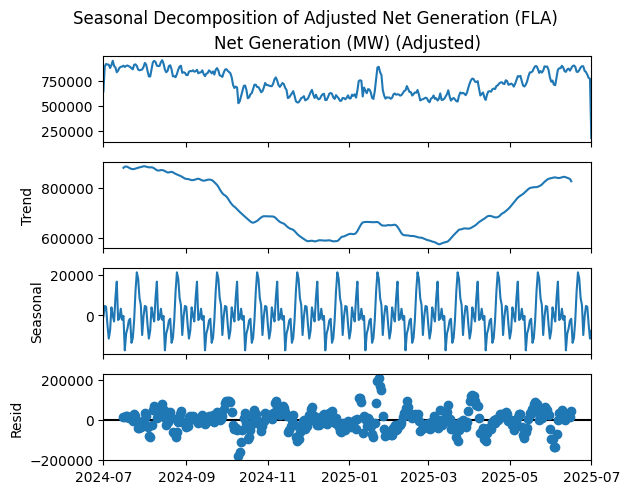

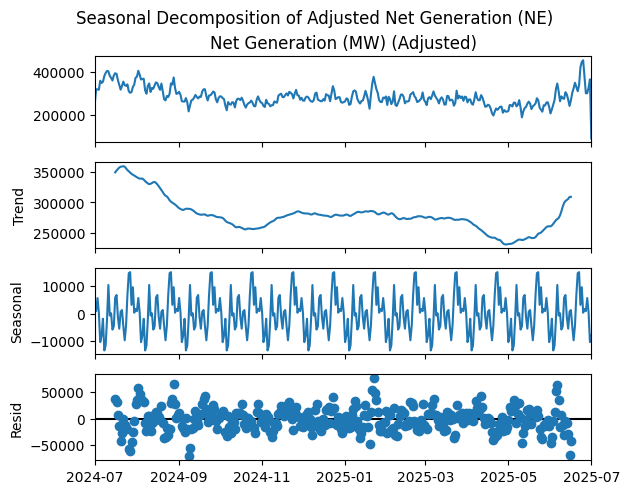

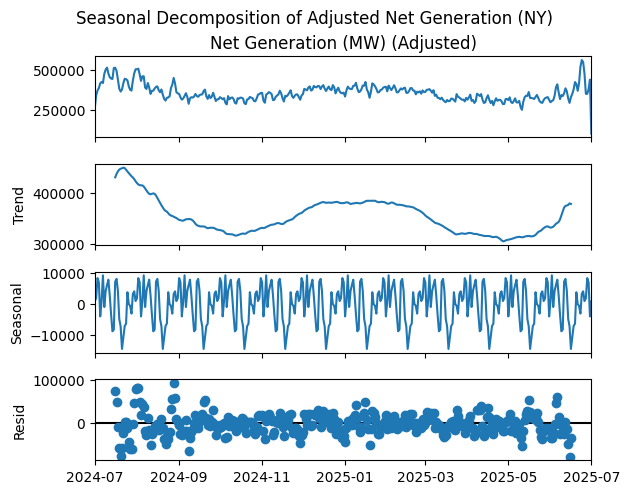

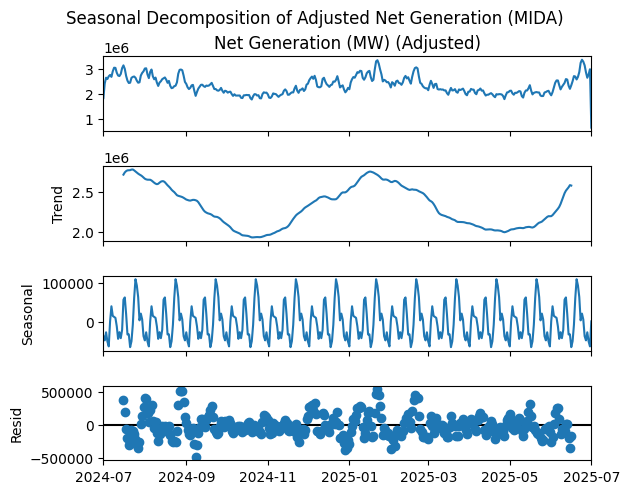

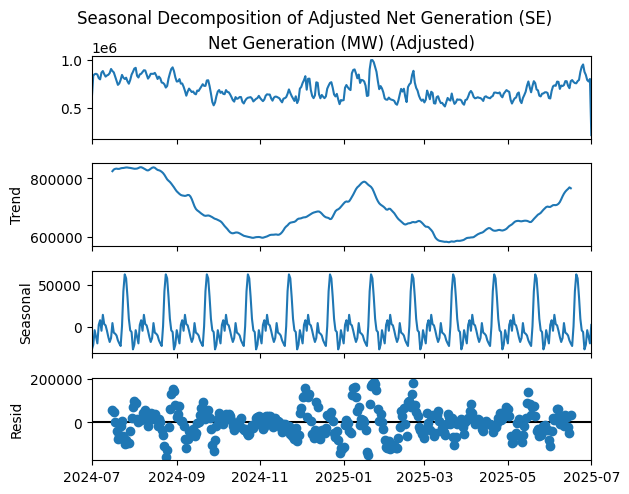

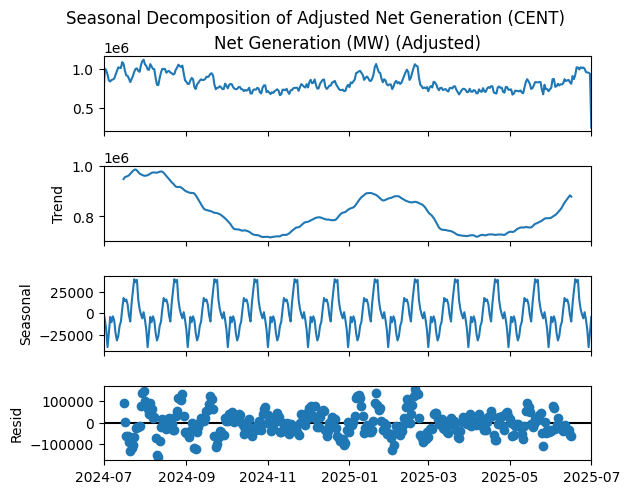

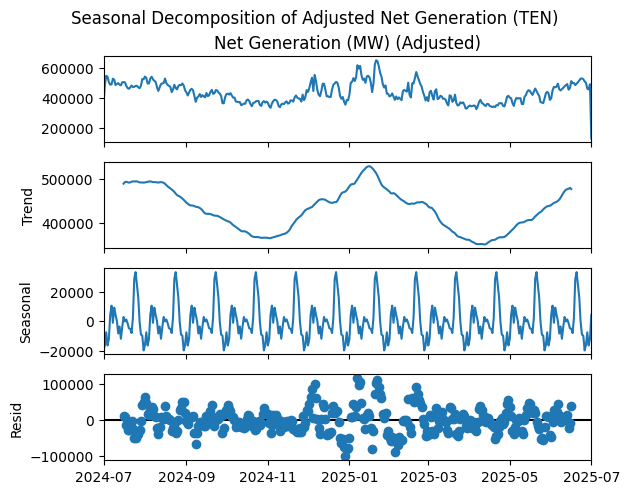

In [184]:
from statsmodels.tsa.seasonal import seasonal_decompose

regions = df["Region"].unique()

for region in regions:
    adjusted_mw_perday_oneregion = (
        df[df["Region"] == region]
        .set_index("UTC Time at End of Hour")["Net Generation (MW) (Adjusted)"]
        .resample("D").sum()
    )

    result = seasonal_decompose(adjusted_mw_perday_oneregion, model="additive", period=30)

    result.plot()
    plt.suptitle(f"Seasonal Decomposition of Adjusted Net Generation ({region})", y=1.02)
    plt.show()

## Finding the spikes

We can see that after plotting our data, there is actually no pattern to the spikes that we could find. Initially, we thought that maybe it was because there was an extra surge on the fist or last day of the month. Since this is grouped by region and not balancing authority, it's hard to pinpoint it to one specific balancing authority and whether they potentially have an artificial influx due to data or business processing.

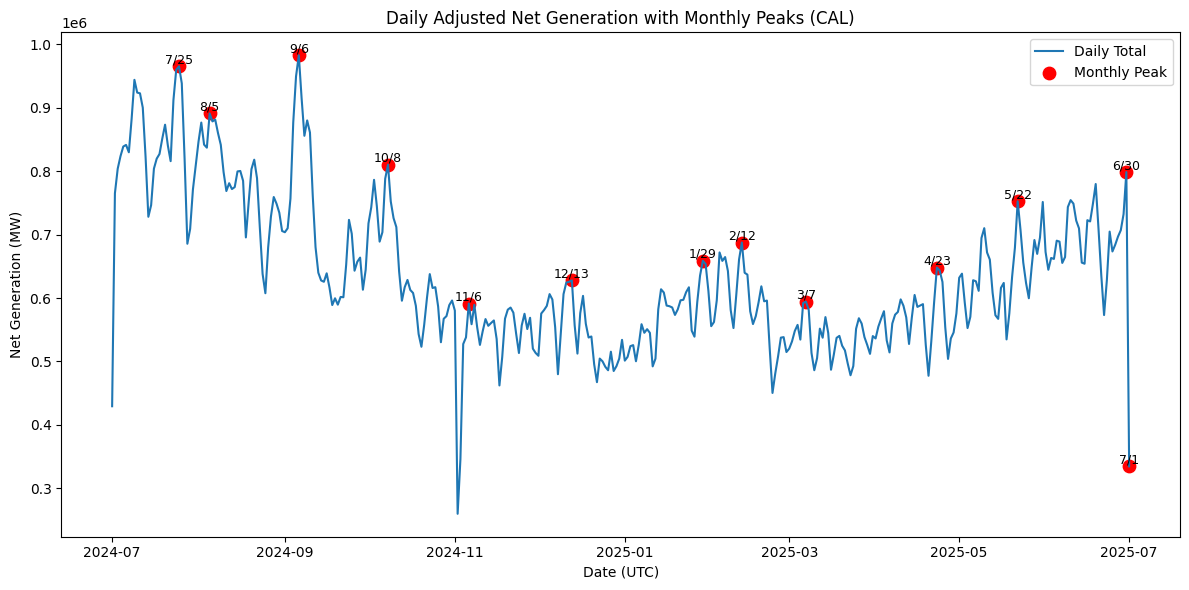

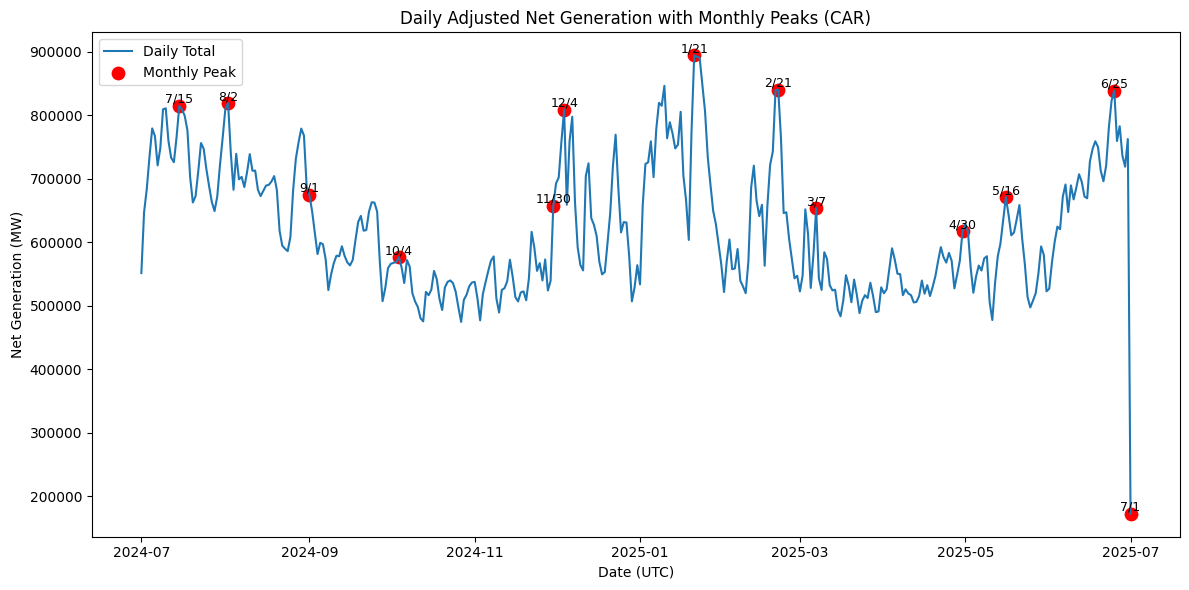

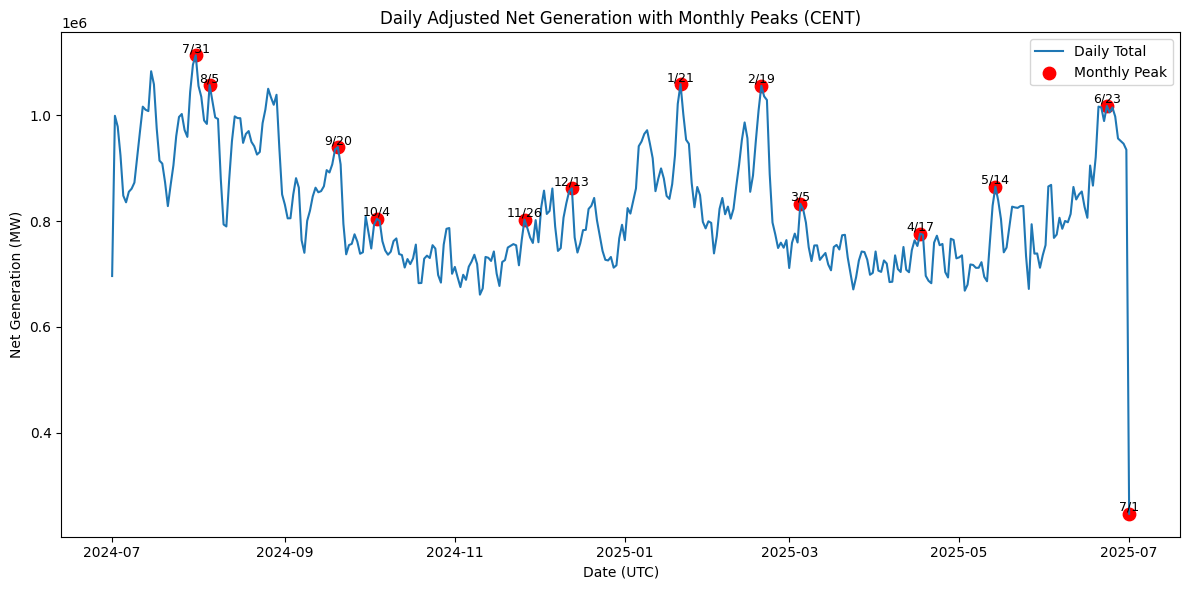

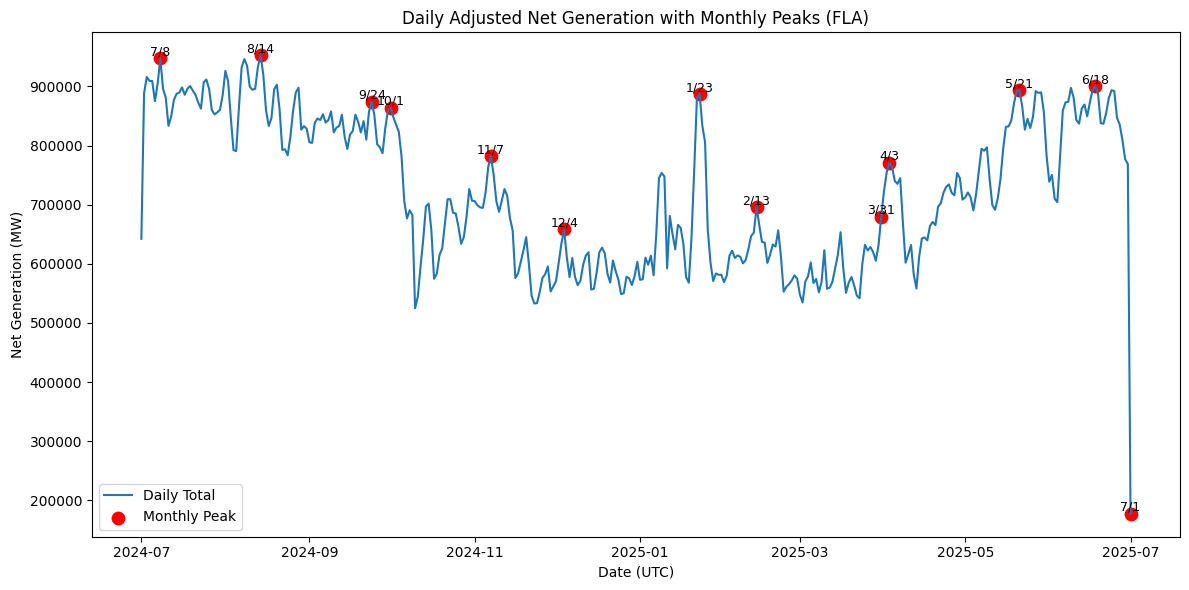

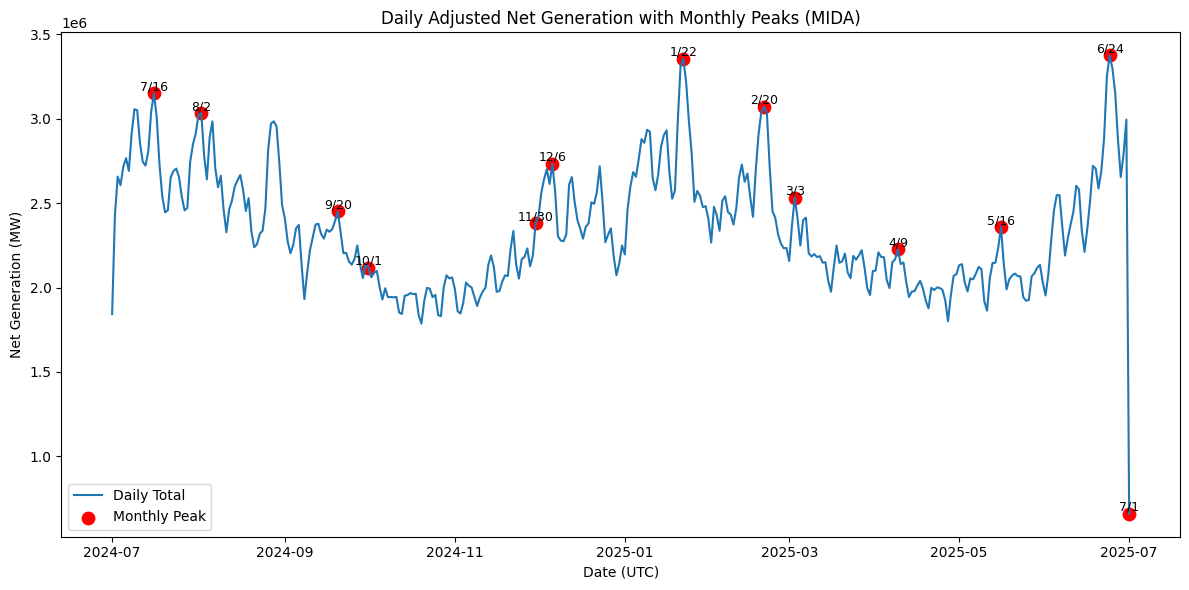

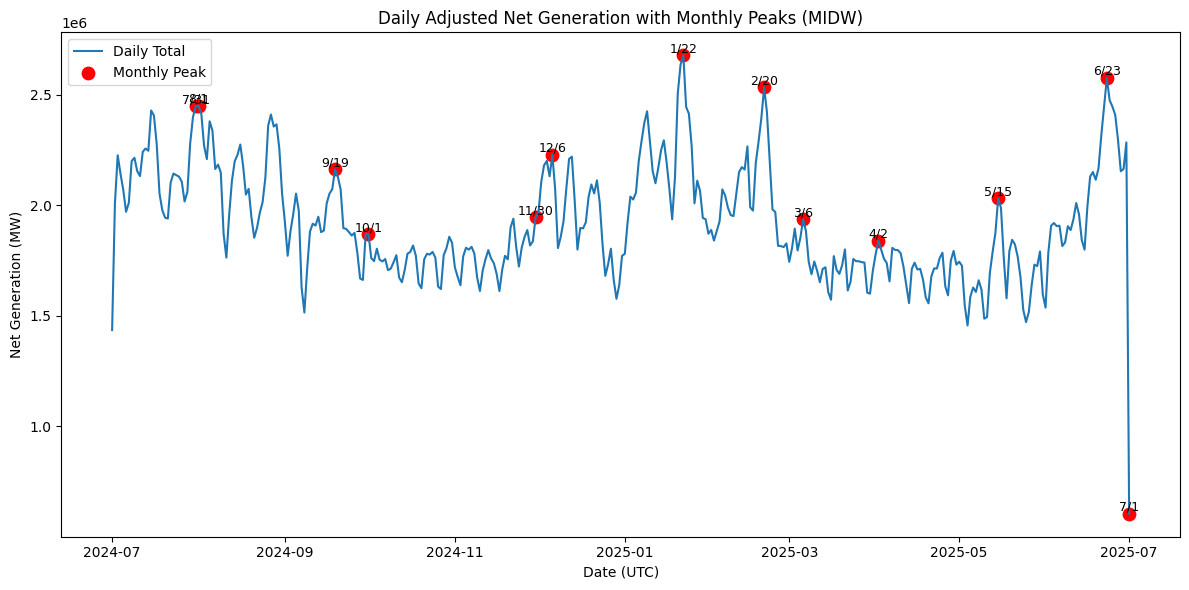

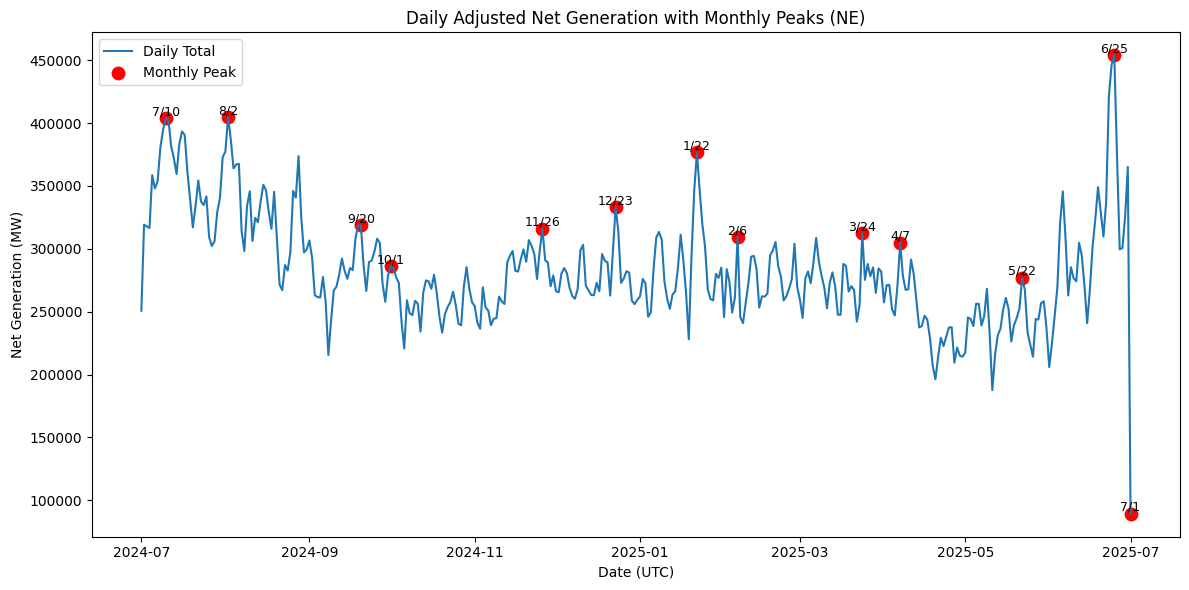

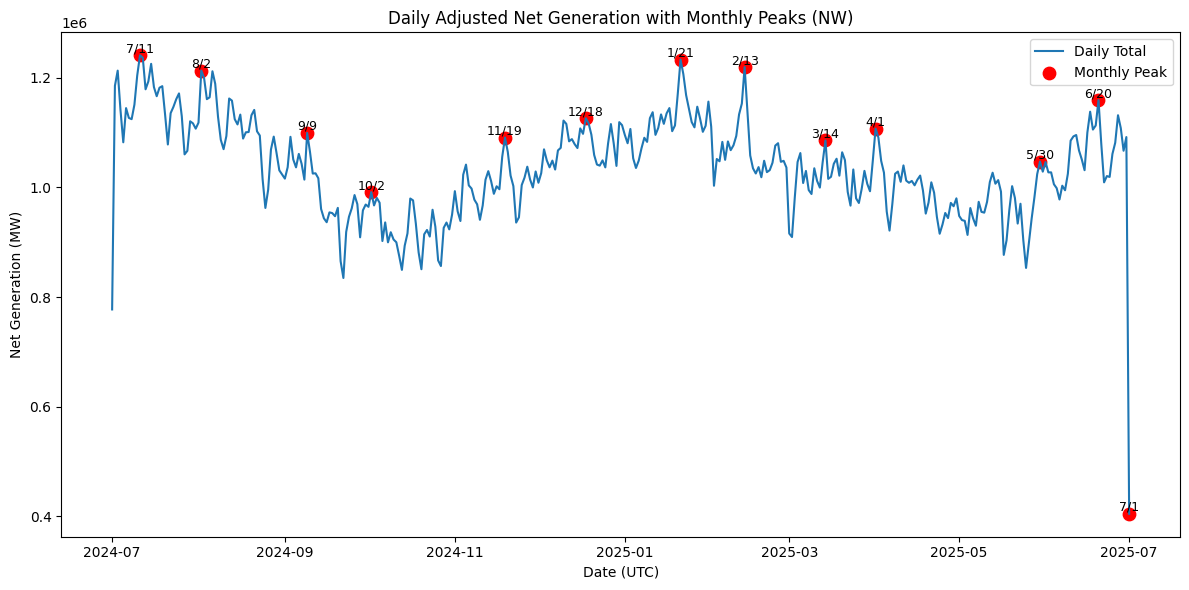

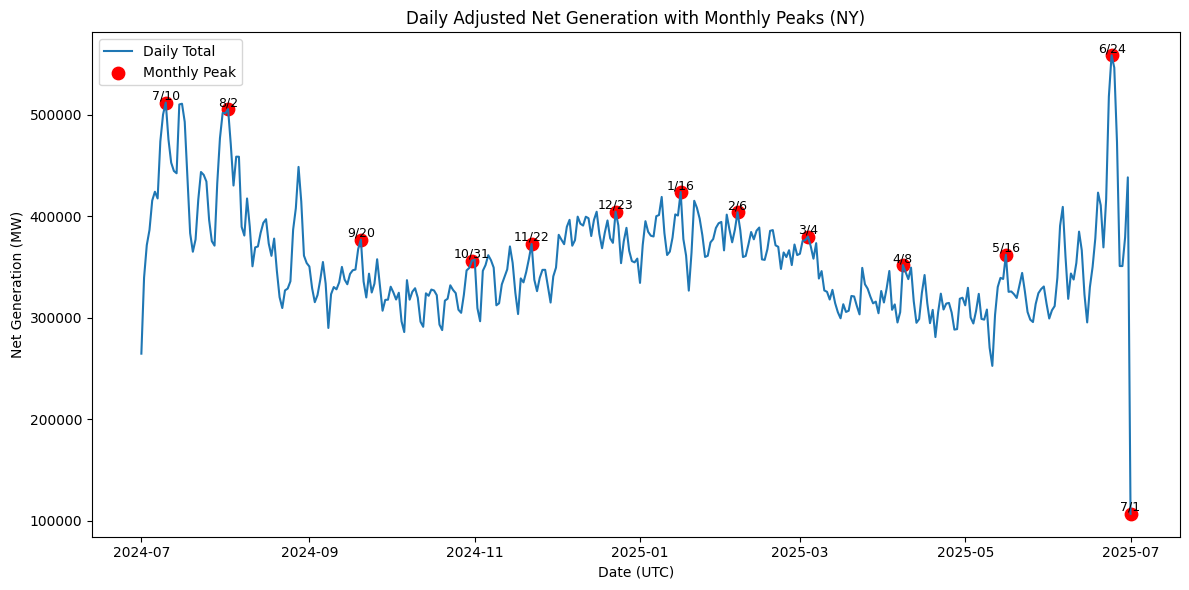

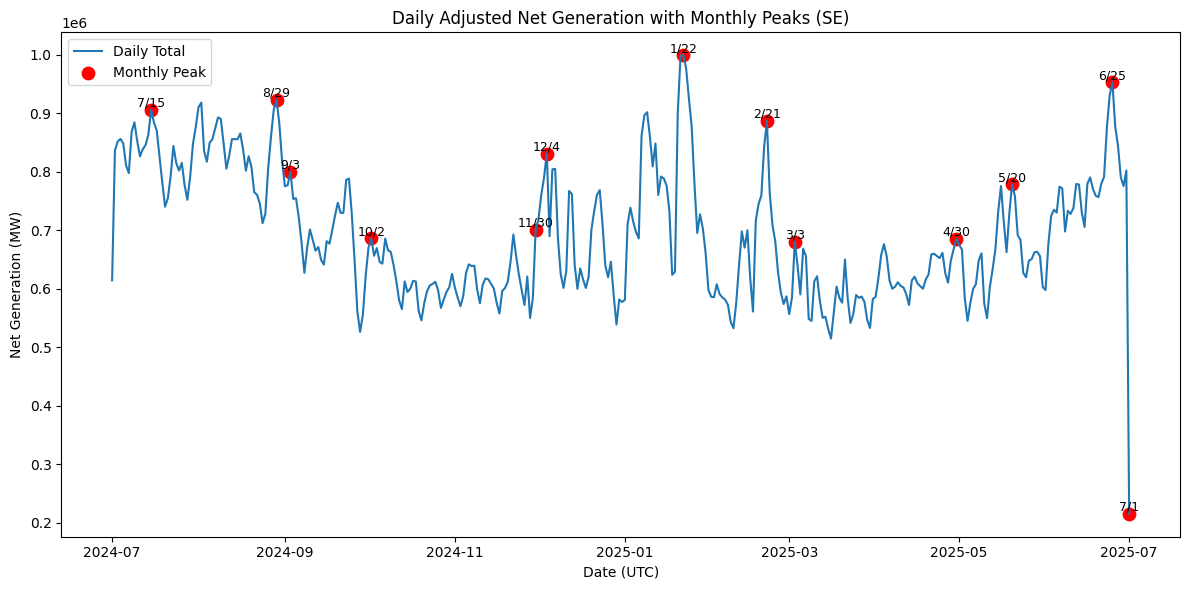

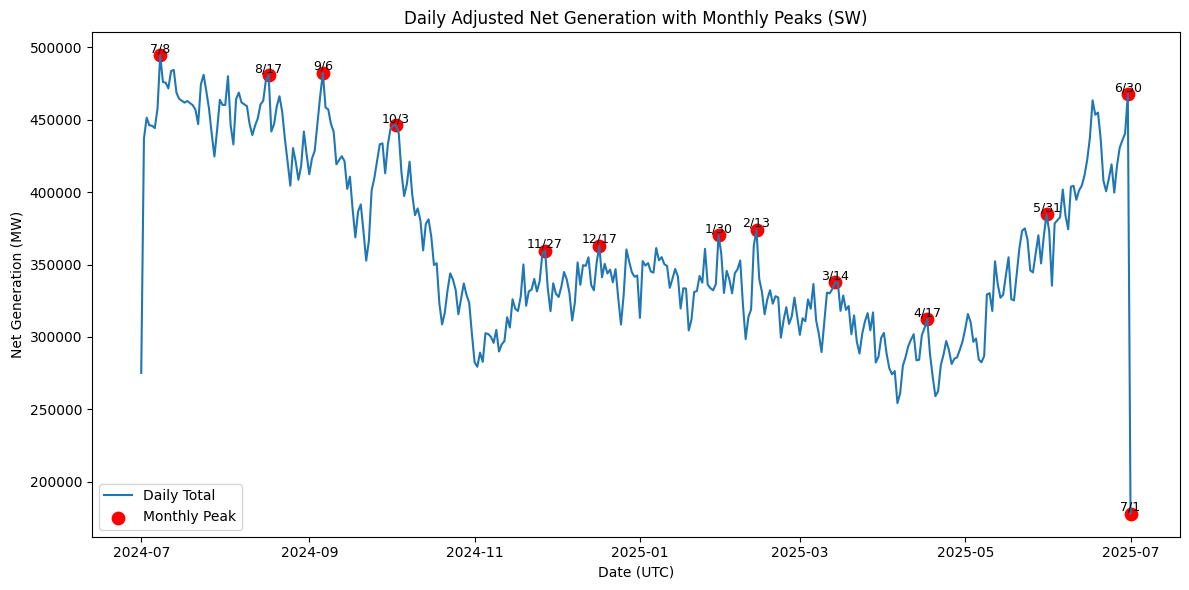

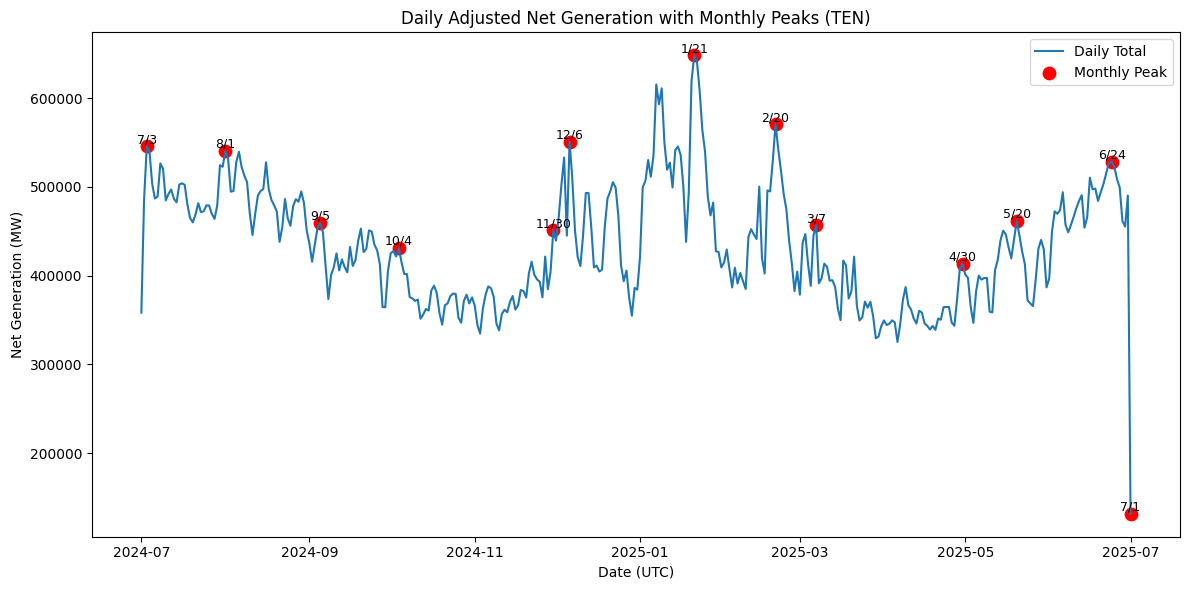

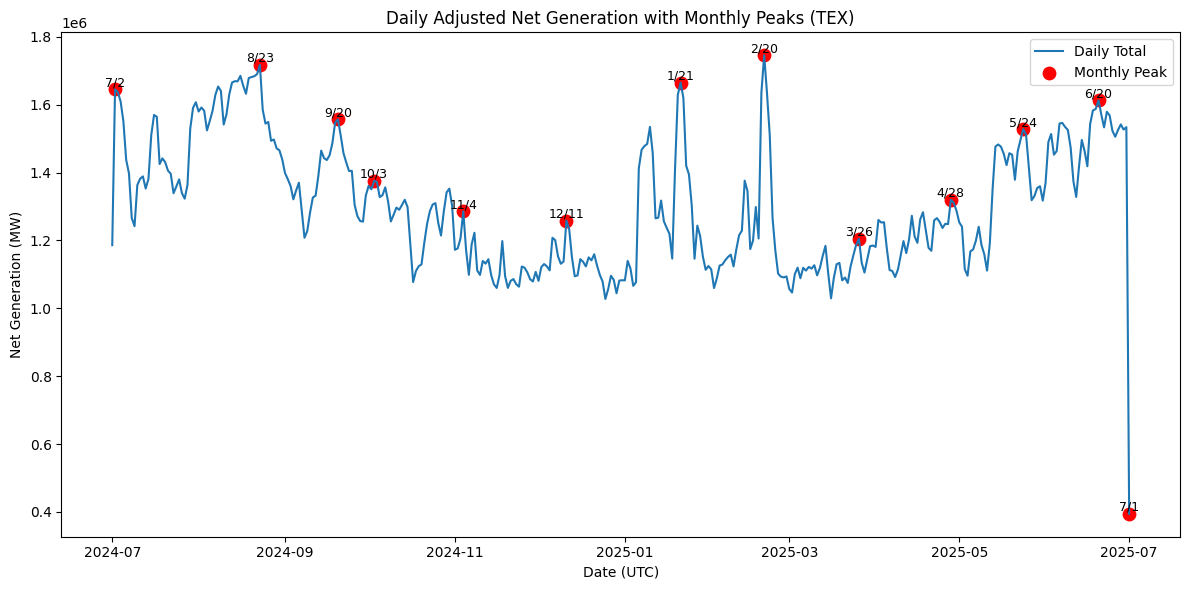

In [185]:
adjusted_mw_perday_allregions = df.set_index("UTC Time at End of Hour").groupby("Region")[
    "Net Generation (MW) (Adjusted)"].resample(
    "D").sum().reset_index()

# Add a year month column, we need just the year and month to properly group by and find the max
adjusted_mw_perday_allregions["YearMonth"] = adjusted_mw_perday_allregions["UTC Time at End of Hour"].dt.to_period("M")

# Now we can find the highest day per month and find adjusted net generation
max_days = adjusted_mw_perday_allregions.loc[adjusted_mw_perday_allregions.groupby(["Region", "YearMonth"])[
    "Net Generation (MW) (Adjusted)"].idxmax()].sort_values(["Region", "UTC Time at End of Hour"])

regions = adjusted_mw_perday_allregions["Region"].unique()

for region in regions:
    subset = adjusted_mw_perday_allregions[adjusted_mw_perday_allregions["Region"] == region]
    peaks = max_days[max_days["Region"] == region]

    # Plot the actual generation in a line
    plt.figure(figsize=(12, 6))
    plt.plot(
        subset["UTC Time at End of Hour"],
        subset["Net Generation (MW) (Adjusted)"],
        label="Daily Total"
    )

    # Scatter plot the peak day (it's just one dot per month)
    plt.scatter(
        peaks["UTC Time at End of Hour"],
        peaks["Net Generation (MW) (Adjusted)"],
        color="red", s=80, label="Monthly Peak"
    )

    # We want to see the specific day of the month for each month
    for _, row in peaks.iterrows():
        day_label = row["UTC Time at End of Hour"].day
        month_label = row["UTC Time at End of Hour"].month
        label = f"{month_label}/{day_label}"
        plt.text(
            row["UTC Time at End of Hour"],
            row["Net Generation (MW) (Adjusted)"],
            str(label),
            color="black", fontsize=9, ha="center", va="bottom"
        )

    plt.title(f"Daily Adjusted Net Generation with Monthly Peaks ({region})")
    plt.ylabel("Net Generation (MW)")
    plt.xlabel("Date (UTC)")
    plt.legend()
    plt.tight_layout()
    plt.show()

## Transitioning to AI Datacenters

Now that we have a good idea of what our data looks like, we can focus on the more interesting part of our project: datacenters. This is no easy task. Firstly, we do have a list of datacenters by state. However, each BA does not "belong" to a state. The good news is that we're not interested in all 50 states for the scope of this project. We're mostly interested in Virginia, California, and Texas. They by far have the most amount of datacenters. What we can do is figure out the interchange between BA's. If a BA from another state is exporting a lot to the BA that handles Virginia, we can assume it is under strain. Doing it by region alone is not enough. This can be proven quite easily. Take a look at the datacenters in Virginia and West Virginia. WV has three whereas VA has the most. They technically are under the same BA. It's not enough to just look at the region nor state. BA is the only way we can get granular enough.

In [188]:
import requests
import os
from dotenv import load_dotenv

load_dotenv()
eia_api_key = os.getenv("EIA_API_KEY")

url = "https://api.eia.gov/v2/electricity/rto/interchange-data/data/"


def fetch_interchange_to_csv(
        start="2025-01-01T00",
        end="2025-07-31T00",
        output_file="interchange_data.csv",
        max_rows=None,
):
    offset = 0
    length = 5000
    total_fetched = 0
    header_written = False

    # We can't use Pandas. It will run out of memory
    with open(output_file, "w", newline="", encoding="utf-8") as f:
        while True:
            params = {
                "frequency": "hourly",
                "data[0]": "value",
                "start": start,
                "end": end,
                "sort[0][column]": "period",
                "sort[0][direction]": "desc",
                "offset": offset,
                "length": length,
                "api_key": eia_api_key,
            }

            response = requests.get(url, params=params)
            data = response.json()

            if "response" not in data:
                print("Bad response", data)
                break

            rows = data["response"]["data"]
            if not rows:
                print("Data successfully fetched!")
                break

            interchange_ba = pd.json_normalize(rows)
            interchange_ba.rename(
                columns={
                    "fromba": "FromBA",
                    "fromba-name": "FromBAName",
                    "toba": "ToBA",
                    "toba-name": "ToBAName",
                    "value": "MWh",
                },
                inplace=True,
            )

            # Convert datatypes
            if "period" in interchange_ba.columns:
                interchange_ba["period"] = pd.to_datetime(interchange_ba["period"], errors="coerce")
            if "MWh" in interchange_ba.columns:
                interchange_ba["MWh"] = pd.to_numeric(interchange_ba["MWh"], errors="coerce")

            # Write to CSV (append mode after first chunk)
            interchange_ba.to_csv(f, index=False, header=not header_written)
            header_written = True

            total_fetched += len(interchange_ba)
            offset += length

            # stop if we hit max_rows
            if max_rows and total_fetched >= max_rows:
                break

    print(f"Saved {total_fetched} rows to {output_file}")


# Example usage: stream everything into CSV
fetch_interchange_to_csv(
    start="2025-07-01T00",
    end="2025-07-31T00",
    output_file="interchange_july_2025.csv",
    max_rows=None,
)

Data successfully fetched!
Saved 233642 rows to interchange_july_2025.csv


## Add region for visibility

Now that we have the CSV of the BA transactions, we can add the region per each for better visibility. This data does exist, we're just adding it for better understanding of our data.

In [191]:
ba_lookup_path = "EIA930_Reference_Tables.xlsx"

df_lookup = pd.read_excel(ba_lookup_path, engine="openpyxl")

df_lookup = df_lookup[["BA Code", "Region/Country Code", "Region/Country Name"]].rename(
    columns={"BA Code": "BA", "Region/Country Code": "RegionCode", "Region/Country Name": "RegionName"})

interchange_path = "interchange_july_2025.csv"

df_interchange = pd.read_csv(interchange_path, parse_dates=["period"])

df_interchange = df_interchange.merge(df_lookup, left_on="FromBA", right_on="BA", how="left").rename(
    columns={"RegionCode": "FromRegionCode", "RegionName": "FromRegionName"}).drop(columns=["BA"])

df_interchange = df_interchange.merge(df_lookup, left_on="ToBA", right_on="BA", how="left").rename(
    columns={"RegionCode": "ToRegionCode", "RegionName": "ToRegionName"}).drop(columns=["BA"])

df_interchange.to_csv("interchange_july_2025_with_regions.csv", index=False)

print(f"Added region and saved new CSV file")


Added region and saved new CSV file


### AI Disclosure

ChatGPT was used to help generate the Matplotlib graph showcasing the "Adjusted Net Generation by Fuel Source per Region". Since there were a lot of columns, ChatGPT was used to assist in attempting to visualize the large amount of columns in a way that made sense.

We also used ChatGPT to help with some minor clarifications with syntax relating to Pandas.